## CROP PREDICTION

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
price=pd.read_csv("/content/price.csv")

In [ ]:
price.head()

,state,district,market,variety,min_price,max_price,modal_price,N,P,K,temperature,humidity,ph,rainfall,label
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,6000,8000,7000,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,4500,5500,5000,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),6000,8000,7000,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,6000,8000,7000,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,110000,130000,120000,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
price.shape

(2200, 15)

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        2200 non-null   object 
 1   district     2200 non-null   object 
 2   market       2200 non-null   object 
 3   variety      2200 non-null   object 
 4   min_price    2200 non-null   int64  
 5   max_price    2200 non-null   int64  
 6   modal_price  2200 non-null   int64  
 7   N            2200 non-null   int64  
 8   P            2200 non-null   int64  
 9   K            2200 non-null   int64  
 10  temperature  2200 non-null   float64
 11  humidity     2200 non-null   float64
 12  ph           2200 non-null   float64
 13  rainfall     2200 non-null   float64
 14  label        2200 non-null   object 
dtypes: float64(4), int64(6), object(5)
memory usage: 257.9+ KB


In [ ]:
price.isnull().sum()

state          0
district       0
market         0
variety        0
min_price      0
max_price      0
modal_price    0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
price.describe()

,min_price,max_price,modal_price,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,2443.958636,2847.774091,2689.228182,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,3464.487318,3935.848640,3710.361267,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,0.000000,2.000000,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,800.000000,1000.000000,950.000000,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,1700.000000,1950.000000,1825.000000,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,3200.000000,3700.000000,3500.000000,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,110000.000000,130000.000000,120000.000000,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
price.duplicated().sum()

0

In [ ]:
price.skew()

<ipython-input-9-2ae5821f1a00>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  price.skew()


min_price      15.291475
max_price      16.750615
modal_price    15.926745
N               0.509721
P               1.010773
K               2.375167
temperature     0.184933
humidity       -1.091708
ph              0.283929
rainfall        0.965756
dtype: float64

In [ ]:
pred=price.drop(['min_price','max_price'],axis=1)
pred

,state,district,market,variety,modal_price,N,P,K,temperature,humidity,ph,rainfall,label
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,7000,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,5000,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),7000,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,7000,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,120000,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,North 24 Parganas,Habra,Onion,1000,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,West Bengal,North 24 Parganas,Habra,Papaya (Raw),800,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,West Bengal,North 24 Parganas,Habra,Potato,560,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,West Bengal,North 24 Parganas,Habra,Pumpkin,1500,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
pred.skew()

<ipython-input-11-921b6e17225f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pred.skew()


modal_price    15.926745
N               0.509721
P               1.010773
K               2.375167
temperature     0.184933
humidity       -1.091708
ph              0.283929
rainfall        0.965756
dtype: float64

In [ ]:
predict=np.log(pred['modal_price'])
predict.skew()

-1.7925365377303473

In [ ]:
predict.skew()

-1.7925365377303473

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

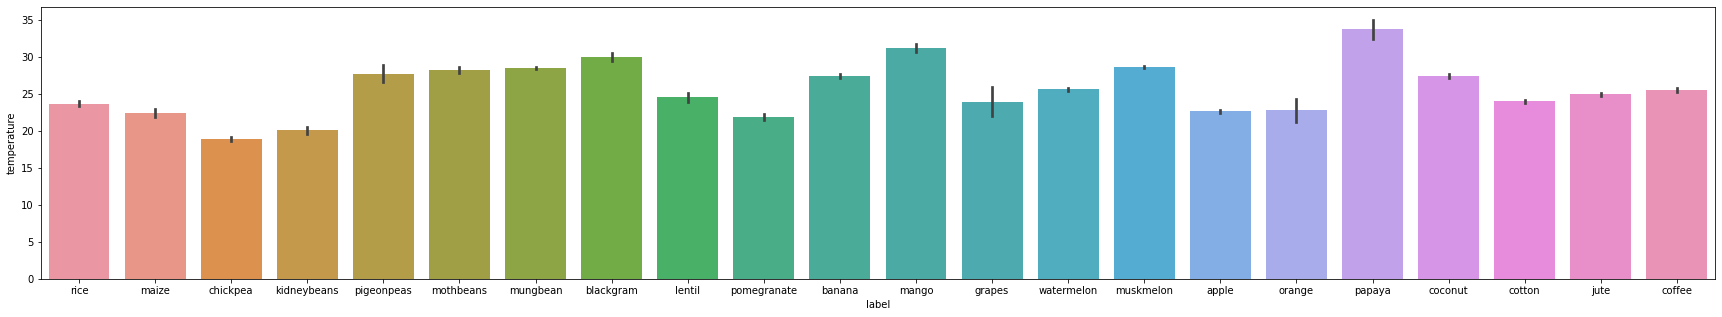

In [ ]:
plt.figure(figsize=(30,5))
sns.barplot(x="label",y="temperature",data=pred)
plt.show()

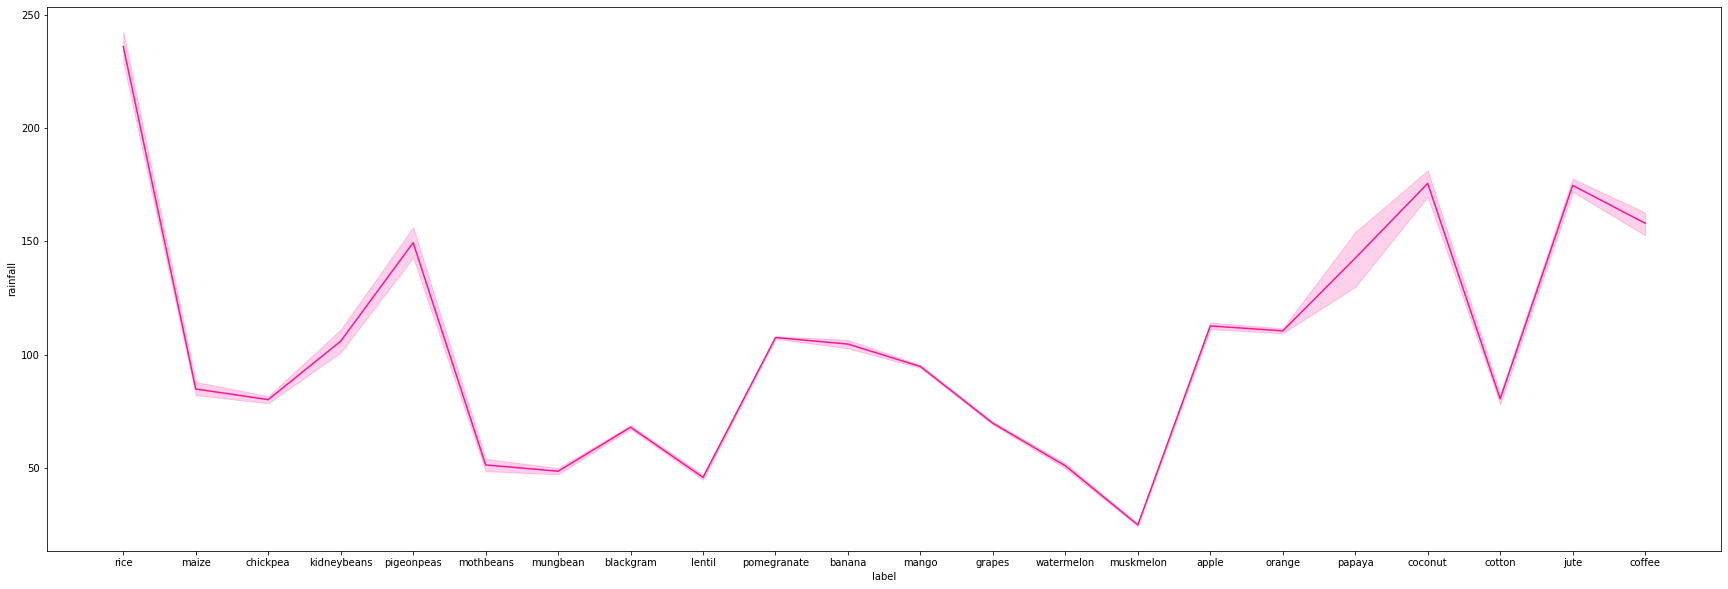

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(x="label",y="rainfall",color='deeppink',data=pred)
plt.show()

In [ ]:
print(pred['state'].unique())
print(pred['district'].unique())

['Andaman and Nicobar' 'Andhra Pradesh' 'Assam' 'Chattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Nagaland'
 'Odisha' 'Pondicherry' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Uttar Pradesh' 'Uttrakhand' 'West Bengal']
['South Andaman' 'Chittor' 'Kurnool' 'West Godavari' 'Cachar' 'Darrang'
 'Dhubri' 'Jorhat' 'Kamrup' 'Sonitpur' 'Bastar' 'Kanker' 'Surajpur'
 'North Goa' 'Amreli' 'Anand' 'Bharuch' 'Kachchh' 'Kheda' 'Panchmahals'
 'Surat' 'Vadodara(Baroda)' 'Valsad' 'Ambala' 'Faridabad' 'Gurgaon'
 'Kurukshetra' 'Mewat' 'Panipat' 'Kangra' 'Kullu' 'Badgam' 'Bangalore'
 'Kolar' 'Tumkur' 'Alappuzha' 'Ernakulam' 'Kannur' 'Kasargod' 'Kollam'
 'Kottayam' 'Malappuram' 'Thirssur' 'Thiruvananthapuram' 'Anupur'
 'Badwani' 'Dhar' 'Dindori' 'Jhabua' 'Khandwa' 'Narsinghpur' 'Sheopur'
 'Ahmednagar' 'Buldhana' 'Jalgaon' 'Kolhapur' 'Nagpur' 'Nanded' 'Nashik'
 'Pune' 'Satara' 'Sholapur' '

In [ ]:
pred['state'].nunique()

26

In [ ]:
pred['state'].value_counts()
pred['district'].value_counts()

Agra                         123
Pune                          89
Saharanpur                    79
Kangra                        75
Thirssur                      71
                            ... 
Kurukshetra                    1
Nizamabad                      1
Khammam                        1
Ramanathapuram                 1
Nagercoil (Kannyiakumari)      1
Name: district, Length: 171, dtype: int64

In [ ]:
pred=pred.drop('market', axis=1
)

In [ ]:
pred

,state,district,variety,modal_price,N,P,K,temperature,humidity,ph,rainfall,label
0,Andaman and Nicobar,South Andaman,Amaranthus,7000,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,Andaman and Nicobar,South Andaman,Banana - Green,5000,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,Andaman and Nicobar,South Andaman,Bhindi(Ladies Finger),7000,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,Andaman and Nicobar,South Andaman,Bitter gourd,7000,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,Andaman and Nicobar,South Andaman,Black pepper,120000,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,North 24 Parganas,Onion,1000,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,West Bengal,North 24 Parganas,Papaya (Raw),800,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,West Bengal,North 24 Parganas,Potato,560,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,West Bengal,North 24 Parganas,Pumpkin,1500,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
s = (pred.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['state', 'district', 'variety', 'label']


In [ ]:
pred['state']=pred['state'].astype('category')
pred['state']=pred['state'].cat.codes

In [ ]:
pred['state'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int8)

In [ ]:
pred=pred.drop(['district','variety'],axis=1)

In [ ]:
pred

,state,modal_price,N,P,K,temperature,humidity,ph,rainfall,label
0,0,7000,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,0,5000,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,0,7000,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,0,7000,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,0,120000,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...,...,...
2195,25,1000,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,25,800,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,25,560,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,25,1500,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
pred['label'].nunique()

22

In [ ]:
pred['label']=pred['label'].astype('category')
pred['label']=pred['label'].cat.codes

In [ ]:
y=pred['label']
y.nunique()

22

In [ ]:
X=pred.drop('label',axis=1)
X

,state,modal_price,N,P,K,temperature,humidity,ph,rainfall
0,0,7000,90,42,43,20.879744,82.002744,6.502985,202.935536
1,0,5000,85,58,41,21.770462,80.319644,7.038096,226.655537
2,0,7000,60,55,44,23.004459,82.320763,7.840207,263.964248
3,0,7000,74,35,40,26.491096,80.158363,6.980401,242.864034
4,0,120000,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...,...
2195,25,1000,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,25,800,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,25,560,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,25,1500,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,train_size=0.75,random_state=15)

In [ ]:
x_train

,state,modal_price,N,P,K,temperature,humidity,ph,rainfall
1314,20,1350,104,17,46,25.713143,80.229728,6.190016,43.089618
573,10,3100,26,51,25,28.764890,52.627415,7.792508,55.216067
320,7,5500,19,78,16,20.653758,23.105386,5.967533,67.717689
923,13,2500,9,16,39,18.411644,91.119272,6.101199,105.183498
791,12,4,59,58,17,28.546224,66.313941,7.368319,62.834699
...,...,...,...,...,...,...,...,...,...
221,6,2900,25,68,77,20.093406,15.112796,7.701446,85.749049
943,14,4000,38,21,35,20.336911,89.380038,5.841367,110.965314
630,10,2500,35,41,18,28.705627,81.592007,6.705009,59.870654
2133,25,2250,82,24,33,26.535432,67.096081,6.809594,120.649443


In [ ]:
y_train

1314    21
573     13
320      9
923     19
791      2
        ..
221      3
943     19
630     14
2133     5
1739    17
Name: label, Length: 1650, dtype: int8

In [ ]:
x_test

,state,modal_price,N,P,K,temperature,humidity,ph,rainfall
1123,18,1000,28,37,28,32.134097,50.525591,6.097870,98.633337
1754,23,1800,40,65,49,35.328764,91.061385,6.678449,163.906937
442,10,2500,2,67,18,34.519348,47.529800,5.921667,129.006461
2013,23,1000,60,55,40,24.994996,88.956928,7.027780,151.493563
1388,20,4595,110,21,54,26.736908,87.824302,6.747538,47.464470
...,...,...,...,...,...,...,...,...,...
146,5,3005,61,60,15,24.875028,68.742483,6.265564,91.260567
1229,19,1750,23,142,197,39.065555,82.038130,6.000574,69.307729
583,10,1100,29,41,21,31.493981,62.849169,8.869797,64.568076
1697,23,460,6,7,7,27.681673,94.473169,7.199106,113.999515


In [ ]:
y_test

1123    12
1754    17
442     18
2013     8
1388    21
        ..
146     11
1229     7
583     13
1697    16
998     19
Name: label, Length: 550, dtype: int8

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([12,  8,  9,  8,  2,  4, 13, 10,  2,  0,  6, 12, 10,  3, 19,  1, 13,
        5,  6,  2,  2, 11,  4, 18, 21,  4, 18,  5,  1,  3, 21, 10,  1,  1,
        8,  1,  9, 18,  1, 10, 15,  9,  2,  6,  8,  7,  8, 10,  6, 21,  2,
        8,  2, 13,  2, 12,  8,  5,  4,  3,  2, 15,  5, 19,  1, 16,  7, 14,
       14,  0, 12, 13, 10,  4, 12, 14, 17, 18, 18,  6,  4,  0,  0, 11,  6,
       21,  6,  6,  4, 17,  3, 14,  2,  2, 21,  0, 18, 10, 19,  2, 18,  0,
       19, 21,  7, 14,  8, 16,  9, 19,  7,  8,  4,  8,  5,  3, 11,  9,  8,
        5, 16, 14, 12, 13,  2,  2,  6, 18, 13, 21, 16,  0,  5, 14, 12, 15,
       10, 17,  7,  6, 16,  3,  3, 16,  8, 18,  2,  5,  2,  5,  6,  4,  0,
        5,  5, 15,  3, 21,  2,  4,  0,  5,  5, 17, 15, 13, 16,  7,  1, 11,
       21,  3,  6, 14,  8,  4, 21,  2, 20, 18, 14, 15, 16, 12,  9, 16,  9,
       11, 16, 14,  1,  3, 20,  8,  5, 19, 10,  5, 14,  1,  0, 12,  6, 19,
        9,  1, 19,  6,  7, 12,  5,  7, 13, 11, 16, 18,  4, 16,  3,  4, 15,
       12, 15,  0, 15, 18

In [ ]:
from sklearn.metrics import accuracy_score
model.score(x_test,y_pred)

1.0

In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

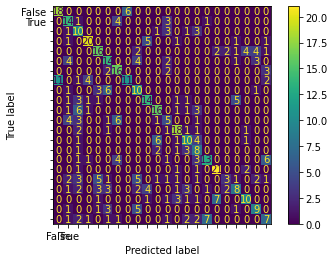

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.49272727272727274

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 25  0  0  0  0  2  0  0  0]
 [ 0  0  0  0

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.9781818181818182
